In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install sqlalchemy mysqlclient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mysqlclient: filename=mysqlclient-2.2.4-cp310-cp310-linux_x86_64.whl size=124731 sha256=433ba5224f4bab062320680f205d0bc568c5d062cf792228f23ad7894030cb5e
  Stored in directory: /root/.cache/pip/wheels/ac/96/ac/2a4d8cb58a4d95de1dffc3f8b0ea42e0e5b63ab97640edbda3
Successfully built mysqlclient


In [ ]:
!pip install matplotlib seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests

from bs4 import BeautifulSoup

import pandas as pd

from sqlalchemy import create_engine

In [ ]:
#urls for player name, team, contract length
#catchers url
url1 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/c'

#1B url
url2 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/1b'

#2B url
url3 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/2b'

#3b url
url4 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/3b'

#SS url
url5 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/ss'

#RF url
url6 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/rf'

#CF url
url7 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/cf'

#LF url
url8 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/lf'

#pitchers url
url9 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/p'

#dh url
url10 = 'https://www.spotrac.com/mlb/rankings/_/year/2024/position/dh'

extended_request = requests.get(url1)

In [ ]:
extended_request

<Response [200]>

In [ ]:
extended_request.text

'<!DOCTYPE html>\n<html lang="en">\n  \n\t<head>\n\t<meta charset="utf-8">\n\t<title>2024 MLB Rankings</title>\n\t\n    <!-- SEO Meta Tags-->\n\t<meta name="description" content="Listing the top salaries, cap hits, cash, earnings, contracts, and bonuses, for all active MLB players.">\n\t<meta name="keywords" content="2024, MLB, rankings, player, position">\n\t<meta name="author" content="Spotrac">\n\t\n    <!-- Viewport-->\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\n    \n    <meta property="fb:app_id" content="206107179423868" />\n    <meta property="fb:admins" content="513540967"/>\n    <meta property="og:site_name" content="spotrac.com" />\n    <meta property="og:url" content="https://www.spotrac.com/mlb/rankings/_/year/2024/position/c" />\n    <meta property="og:title" content="2024 MLB Rankings"/>\n        <meta property="og:description" content="Listing the top salaries, cap hits, cash, earnings, contracts, and bonuses, for all active MLB players." />

In [ ]:
soup = BeautifulSoup(extended_request.text, 'html.parser')

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   2024 MLB Rankings
  </title>
  <!-- SEO Meta Tags-->
  <meta content="Listing the top salaries, cap hits, cash, earnings, contracts, and bonuses, for all active MLB players." name="description"/>
  <meta content="2024, MLB, rankings, player, position" name="keywords"/>
  <meta content="Spotrac" name="author"/>
  <!-- Viewport-->
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="206107179423868" property="fb:app_id">
   <meta content="513540967" property="fb:admins">
    <meta content="spotrac.com" property="og:site_name">
     <meta content="https://www.spotrac.com/mlb/rankings/_/year/2024/position/c" property="og:url">
      <meta content="2024 MLB Rankings" property="og:title">
       <meta content="Listing the top salaries, cap hits, cash, earnings, contracts, and bonuses, for all active MLB players." property="og:description"/>
       <meta content="https://www.spo

In [ ]:
#list of position urls
position_urls = [
    url1,
    url2,
    url3,
    url4,
    url5,
    url6,
    url7,
    url8,
    url9,
    url10
]

def scrape_contract_data(url):
    # Fetch the webpage
    response = requests.get(url)
    data_list = []
    if response.status_code == 200:
        # Parse the HTML
        soup = BeautifulSoup(response.text, 'html.parser')

        # Navigate to the ordered list of players
        ol_path = soup.select_one('body main div section div div div section article > div:nth-of-type(3) > div:nth-of-type(2) > div:nth-of-type(4) > div:nth-of-type(2) ol')
        player_items = ol_path.find_all('li')

        # Extract information for each player in the list
        for item in player_items:
            player_name = item.select_one('div a').text.strip() if item.select_one('div a') else 'N/A'
            contract_length = item.select_one('div:nth-of-type(2)').text.strip() if item.select_one('div:nth-of-type(2)') else 'N/A'
            team_position_info = item.select_one('div div').text.strip() if item.select_one('div div') else 'N/A\nN/A, N/A'
            team_position_info = team_position_info.split('\n')[-1]  # Split and take the part after the newline
            team, position = (team_position_info.split(',', 1) if ',' in team_position_info else ('N/A', 'N/A'))

            data_list.append({
                'PlayerName': player_name,
                'PlayerTeam': team.strip(),
                'PlayerPosition': position.strip(),
                'ContractLength': contract_length
            })

    else:
        print(f"Failed to retrieve data from {url}")
    return data_list

# List to store each player's data
all_players_data = []

# Scrape data from each URL and add it to the list
for url in position_urls:
    players_data = scrape_contract_data(url)
    all_players_data.extend(players_data)

# Create a DataFrame from the list of data
contracts_df = pd.DataFrame(all_players_data)

# Display the DataFrame
print(contracts_df)

             PlayerName PlayerTeam PlayerPosition ContractLength
0            Will Smith        LAD              C             10
1          Keibert Ruiz        WSH              C              8
2           Sean Murphy        ATL              C              6
3         J.T. Realmuto        PHI              C              5
4     Willson Contreras        STL              C              5
5          Bryce Harper        PHI             1B             13
6            Matt Olson        ATL             1B              8
7      Jake Cronenworth         SD             1B              7
8           Kris Bryant        COL             1B              7
9       Freddie Freeman        LAD             1B              6
10      Xander Bogaerts         SD             2B             11
11          Jose Altuve        HOU             2B              7
12       Andres Gimenez        CLE             2B              7
13         Ozzie Albies        ATL             2B              7
14        Marcus Semien  

In [ ]:
#urls for contract valuation info
#catchers contracts
url11 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/c/sort/contract_value'

#1B contracts
url12 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/1b/sort/contract_value'

#2B contracts
url13 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/2b/sort/contract_value'

#3B contracts
url14 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/3b/sort/contract_value'

#SS contracts
url15 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/ss/sort/contract_value'

#RF contracts
url16 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/rf/sort/contract_value'

#CF contracts
url17 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/cf/sort/contract_value'

#LF contracts
url18 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/lf/sort/contract_value'

#pitchers contracts
url19 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/p/sort/contract_value'

#DH contracts
url20 = 'https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/dh/sort/contract_value'

In [ ]:
additional_request = requests.get(url11)

In [ ]:
additional_request

<Response [200]>

In [ ]:
additional_request.text

'<!DOCTYPE html>\n<html lang="en">\n  \n\t<head>\n\t<meta charset="utf-8">\n\t<title>2024 MLB Salary Rankings</title>\n\t\n    <!-- SEO Meta Tags-->\n\t<meta name="description" content="Listing the top salaries, cap hits, cash, earnings, contracts, and bonuses, for all active MLB players.">\n\t<meta name="keywords" content="2024, MLB, rankings, player, team, position">\n\t<meta name="author" content="Spotrac">\n\t\n    <!-- Viewport-->\n\t<meta name="viewport" content="width=device-width, initial-scale=1">\n    \n    <meta property="fb:app_id" content="206107179423868" />\n    <meta property="fb:admins" content="513540967"/>\n    <meta property="og:site_name" content="spotrac.com" />\n    <meta property="og:url" content="https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/c/sort/contract_value" />\n    <meta property="og:title" content="2024 MLB Salary Rankings"/>\n        <meta property="og:description" content="Listing the top salaries, cap hits, cash, earnings, contract

In [ ]:
values_html = BeautifulSoup(additional_request.text, 'html.parser')
print(values_html.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   2024 MLB Salary Rankings
  </title>
  <!-- SEO Meta Tags-->
  <meta content="Listing the top salaries, cap hits, cash, earnings, contracts, and bonuses, for all active MLB players." name="description"/>
  <meta content="2024, MLB, rankings, player, team, position" name="keywords"/>
  <meta content="Spotrac" name="author"/>
  <!-- Viewport-->
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="206107179423868" property="fb:app_id">
   <meta content="513540967" property="fb:admins">
    <meta content="spotrac.com" property="og:site_name">
     <meta content="https://www.spotrac.com/mlb/rankings/player/_/year/2024/position/c/sort/contract_value" property="og:url">
      <meta content="2024 MLB Salary Rankings" property="og:title">
       <meta content="Listing the top salaries, cap hits, cash, earnings, contracts, and bonuses, for all active MLB players." property="og:descr

In [ ]:
contract_values_urls = [
    url11,
    url12,
    url13,
    url14,
    url15,
    url16,
    url17,
    url18,
    url19,
    url20
]

def add_contract_value_data(df, urls):
    for url in urls:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            # Adjust the selector based on the detailed HTML structure provided
            player_entries = soup.select('body main > div:nth-of-type(2) section div div div section article > div:nth-of-type(3) > div:nth-of-type(2) > div > ul > li')

            for entry in player_entries:
                # Extract player name from the current 'li' element
                player_name = entry.select_one('span a div div').text.strip() if entry.select_one('span a div div') else None

                if player_name:
                    # Check against all players in the DataFrame
                    for i, df_player in df.iterrows():
                        if df_player['PlayerName'].strip() == player_name:
                            # Extract the contract value
                            contract_value_element = entry.select('li span')[1] if len(entry.select('li span')) > 1 else None
                            contract_value = contract_value_element.text.strip() if contract_value_element else 'Value not found'

                            # Update the DataFrame
                            df.at[i, 'ContractValue'] = contract_value
                            break  # Stop searching once a match is found
        else:
            print(f"Failed to retrieve data from {url}")

    return df

# Assuming contract_values_urls is already defined with your specific URLs
contracts_df = add_contract_value_data(contracts_df, contract_values_urls)
contracts_df.at[0, 'ContractValue'] = '$140,000,000'

# Display the updated DataFrame
print(contracts_df)


             PlayerName PlayerTeam PlayerPosition ContractLength ContractValue
0            Will Smith        LAD              C             10  $140,000,000
1          Keibert Ruiz        WSH              C              8   $50,000,000
2           Sean Murphy        ATL              C              6   $73,000,000
3         J.T. Realmuto        PHI              C              5  $115,500,000
4     Willson Contreras        STL              C              5   $87,500,000
5          Bryce Harper        PHI             1B             13  $330,000,000
6            Matt Olson        ATL             1B              8  $168,000,000
7      Jake Cronenworth         SD             1B              7   $80,000,000
8           Kris Bryant        COL             1B              7  $182,000,000
9       Freddie Freeman        LAD             1B              6  $162,000,000
10      Xander Bogaerts         SD             2B             11  $280,000,000
11          Jose Altuve        HOU             2B   

In [ ]:
# save df to a csv file
contracts_df.to_csv('contract_info.csv', index=False)

In [ ]:
def create_db_engine(user, password, host, port, database):
    return create_engine(f'mysql+mysqldb://{user}:{password}@{host}:{port}/{database}')

In [ ]:
#load CSV into DataFrame
def load_csv(file_path):
    return pd.read_csv(file_path)

In [ ]:
# Function to upload DataFrame to MySQL
def upload_to_mysql(df, engine, table_name):
    df.to_sql(name=table_name, con=engine, if_exists='append', index=False, chunksize=500)

In [ ]:
# Main script execution
if __name__ == "__main__":
    # Database credentials and connection details
    USER = 'admin'
    PASSWORD = 'isba_4798'
    HOST = 'isba-dev-01.c7eifmhfznoo.us-east-1.rds.amazonaws.com'
    PORT = '3306'
    DATABASE = 'sql_project'
    TABLE_NAME = 'contract_values'

    # Path to the CSV file
    CSV_FILE_PATH = '/content/contract_info.csv'

    # Create a database engine
    engine = create_db_engine(USER, PASSWORD, HOST, PORT, DATABASE)

    # Load data from CSV
    dataframe = load_csv(CSV_FILE_PATH)

    # Upload data to MySQL
    upload_to_mysql(dataframe, engine, TABLE_NAME)
    print("CSV data has been uploaded successfully to MySQL!")

CSV data has been uploaded successfully to MySQL!


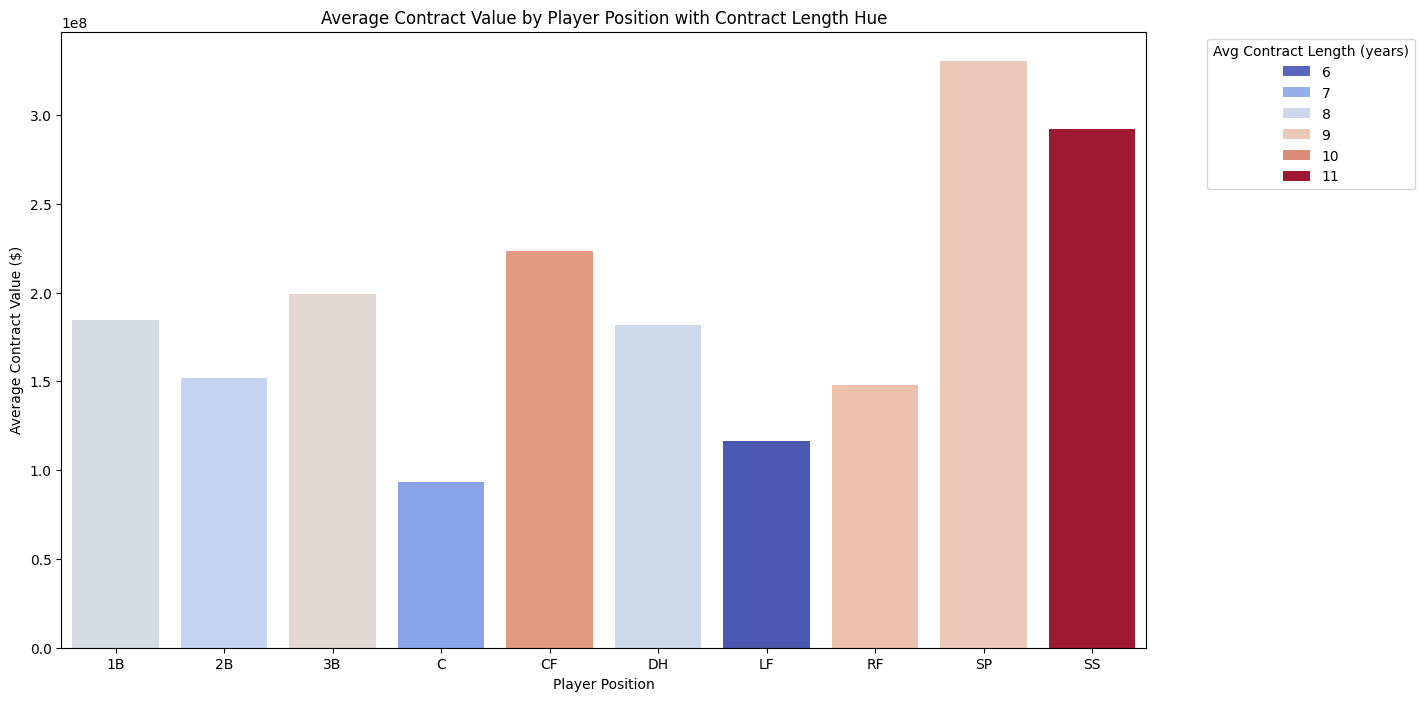

In [ ]:

# Convert ContractValue to a numeric type after removing unwanted characters
contracts_df['ContractValue'] = pd.to_numeric(contracts_df['ContractValue'].replace('[\$,]', '', regex=True), errors='coerce')

# Ensure ContractLength is numeric
contracts_df['ContractLength'] = pd.to_numeric(contracts_df['ContractLength'], errors='coerce')

# Calculate the average contract value and the average contract length per position
grouped_data = contracts_df.groupby('PlayerPosition').agg(
    AvgContractValue=('ContractValue', 'mean'),
    AvgContractLength=('ContractLength', 'mean')
).reset_index()

plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='PlayerPosition',
    y='AvgContractValue',
    data=grouped_data,
    palette="coolwarm",  # Uses the coolwarm palette
    hue='AvgContractLength',
    dodge=False  # Ensures one bar per position
)

plt.title('Average Contract Value by Player Position with Contract Length Hue')
plt.xlabel('Player Position')
plt.ylabel('Average Contract Value ($)')
plt.legend(title='Avg Contract Length (years)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()